### Creating classes
Create classes and complete the blanks with proper implementation of 'grad' and 'value' functions

In [195]:
from collections import defaultdict
from math import sqrt
import numpy as np
from scipy.stats import norm

In [213]:
class Derivative:
    """ Enabling the usage of +, *, -, etc. """
    def __add__(self, other):
        return Add(self, other)
    
    def __radd__(self, other):
        return rAdd(self, other)
    
    def __sub__(self, other):
        return Sub(self, other)

    def __rsub__(self, other):
        return rSub(self, other)
    
    def __mul__(self, other):
        return Mul(self, other)
    
    def __rmul__(self, other):
        return rMul(self, other)
    
    def __truediv__(self, other):
        return Div(self, other)

    def __rtruediv__(self, other):
        return rDiv(self, other)
   
    def Sin(self):
        return Sin(self)
    
    def __pow__(self, power):
        return Pow(self, power)
    
    def Exp(self):
        return Exp(self)
    
    def Cdf(self):
        return Cdf(self)
    
    
    def __hash__(self):                 # we need this for creating the dictionary with keys as Derivatives object
        return hash(str(self))

Leaf nodes

In [214]:
class Var(Derivative):
    """ A leaf node (a node which doesn't have any child) """
    
    def __init__(self, value):
        self.value = value      # the scalar value of the node

Adding the nodes (we filled this example)

In [215]:
class Add(Derivative):
    """ The node that results from adding two nodes """
    def __init__(self, node_a, node_b):
        if isinstance(node_a, (int, float)): 
            self.value = node_a + node_b.value
            self.grad = [(node_b, 1)]
        elif isinstance(node_b, (int, float)): 
            self.value = node_a.value + node_b
            self.grad = [(node_a, 1)]
        else:      
            self.value = node_a.value + node_b.value    # value of the node
            self.grad = [(node_a, 1), (node_b, 1)]      # partial derivatives of nodes - value 1 for derivative in respect to node_a and 1 for node_b

In [216]:
class rAdd(Derivative):
    """ The node that results from adding two nodes """
    def __init__(self, node_a, node_b):
        if isinstance(node_a, (int, float)): 
            self.value = node_a + node_b.value
            self.grad = [(node_b, 1)]
        elif isinstance(node_b, (int, float)): 
            self.value = node_a.value + node_b
            self.grad = [(node_a, 1)]
        else:      
            self.value = node_a.value + node_b.value    # value of the node
            self.grad = [(node_a, 1), (node_b, 1)]      # partial derivatives of nodes - value 1 for derivative in respect to node_a and 1 for node_b

Substract the nodes

In [217]:
class Sub(Derivative):
    """ The node that results from subtracting two nodes """
    def __init__(self, node_a, node_b):
        if isinstance(node_a, (int, float)): 
            self.value = node_a - node_b.value
            self.grad = [(node_b, -1)]
        elif isinstance(node_b, (int, float)): 
            self.value = node_a.value - node_b
            self.grad = [(node_a, 1)]
        else:      
            self.value = node_a.value - node_b.value    # value of the node
            self.grad = [(node_a, 1), (node_b, -1)]      # partial derivatives of nodes - should have again the structure as [(node_a, value), (node_b, value)]

In [218]:
class rSub(Derivative):
    """ The node that results from subtracting two nodes """
    def __init__(self, node_a, node_b):
        if isinstance(node_a, (int, float)): 
            self.value = node_a - node_b.value
            self.grad = [(node_b, -1)]
        elif isinstance(node_b, (int, float)): 
            self.value = node_a.value - node_b
            self.grad = [(node_a, 1)]
        else:      
            self.value = node_a.value - node_b.value    # value of the node
            self.grad = [(node_a, 1), (node_b, -1)]      # partial derivatives of nodes - should have again the structure as [(node_a, value), (node_b, value)]

Multiplication of nodes

In [219]:
class Mul(Derivative):
    """ The node that results from multiplying two nodes """
    def __init__(self, node_a, node_b):
        if isinstance(node_a, (int, float)): 
            self.value = node_a * node_b.value
            self.grad = [(node_b, node_a)]
        elif isinstance(node_b, (int, float)): 
            self.value = node_a.value * node_b
            self.grad = [(node_a, node_b)]
        else:      
            self.value = node_a.value * node_b.value
            self.grad = [(node_a, node_b.value), (node_b, node_a.value)]                                # f = x*y   df / dx = y   df / dy = x

In [220]:
class rMul(Derivative):
    """ The node that results from multiplying two nodes """
    def __init__(self, node_a, node_b):
        if isinstance(node_a, (int, float)): 
            self.value = node_a * node_b.value
            self.grad = [(node_b, node_a)]
        elif isinstance(node_b, (int, float)): 
            self.value = node_a.value * node_b
            self.grad = [(node_a, node_b)]
        else:      
            self.value = node_a.value * node_b.value
            self.grad = [(node_a, node_b.value), (node_b, node_a.value)]                                # f = x*y   df / dx = y   df / dy = x

Dividing nodes

In [221]:
class Div(Derivative):
    """ The node that results from dividing one node by another """
    def __init__(self, node_a, node_b):
        if isinstance(node_a, (int, float)): 
            self.value = node_a / node_b.value
            self.grad = [(node_b, -node_a/(node_b.value**2))]
        elif isinstance(node_b, (int, float)): 
            self.value = node_a.value / node_b
            self.grad = [(node_a, 1/node_b)]
        else:      
            self.value = node_a.value / node_b.value
            self.grad = [(node_a, 1/node_b.value), (node_b, -node_a.value/(node_b.value**2))]           # f = x/y   df / dx = 1/y    df / dy = -x / (y^2)

In [222]:
class rDiv(Derivative):
    """ The node that results from dividing one node by another """
    def __init__(self, node_a, node_b):
        if isinstance(node_a, (int, float)): 
            self.value = node_a / node_b.value
            self.grad = [(node_b, -node_a/(node_b.value**2))]
        elif isinstance(node_b, (int, float)): 
            self.value = node_a.value / node_b
            self.grad = [(node_a, 1/node_b)]
        else:      
            self.value = node_a.value / node_b.value
            self.grad = [(node_a, 1/node_b.value), (node_b, -node_a.value/(node_b.value**2))]           # f = x/y   df / dx = 1/y    df / dy = -x / (y^2)

Logarithm of one mode

In [223]:
class Log(Derivative):
    """ The node that results from sin(node) """
    
    def __init__(self, node):
        if isinstance(node, (int, float)): 
            self.value = np.log(node) 
            self.grad = [(node, 0)]
        else:
            self.value = np.log(node.value)                          
            self.grad = [(node, 1/node.value)]                 

Sinus of one node

In [224]:
class Sin(Derivative):
    """ The node that results from sin(node) """
    
    def __init__(self, node):
        if isinstance(node, (int, float)): 
            self.value = np.sin(node) 
            self.grad = [(node, 0)]
        else:
            self.value = np.sin(node.value)                          # use np.sin() function
            self.grad = [(node, np.cos(node.value))]                 # only one derivative, since it takes only one node - use np.cos() function

Cosinus of one node

In [225]:
class Cos(Derivative):
    """ The node that results from cos(node) """
    
    def __init__(self, node):
        if isinstance(node, (int, float)): 
            self.value = np.cos(node)
            self.grad = [(node, 0)]
        else:
            self.value = np.cos(node.value)                          
            self.grad = [(node, -np.sin(node.value))]                

Powers

In [226]:
class Pow(Derivative):
    """ The node that results as node ^ power """
    
    def __init__(self, node, power):
        self.value = node.value**power                                         # reminder of power operation in python: **
        self.grad = [(node, power*node.value**(power-1))]                      # (one derivative)    f = x^n   df/dx = n * x ^ (n-1)

Exponential

In [227]:
class Exp(Derivative):
    """ The node that results from exp(node) """
    
    def __init__(self, node):
        self.value = np.exp(node.value)                          
        self.grad = [(node, np.exp(node.value))]                

In [228]:
class ExpK(Derivative):
    """ The node that results from exp(k*node) """
    
    def __init__(self, node, k):
        self.value = np.exp(k*node)                          
        self.grad = [(node, k*np.exp(k*node))]                

Squareroot

In [229]:
class Sqrt(Derivative):
    """ The node that results from sqrt(node) """
    
    def __init__(self, node):
        self.value = np.sqrt(node.value)                          
        self.grad = [(node, 1/(2*np.sqrt(node.value)))]                

Logarithm

In [230]:
class Log(Derivative):
    """ The node that results from log(node) """
    
    def __init__(self, node):
        self.value = np.log(node.value)                          
        self.grad = [(node, 1/node.value)]                

$ a^x $

In [231]:
class Pot(Derivative):
    """ The node that results from a ^ node """
    
    def __init__(self, a, node):
        self.value = a**node.value                          
        self.grad = [(node, a**node.value * np.log(a))]                

Cdf

In [232]:
class Cdf(Derivative):
    """ The node that results from cdf(node) """
    
    def __init__(self, node):
        self.value = norm.cdf(node.value)
        self.grad = [(node, 1)]                

### Create a function for getting the gradients values
The algorithm will return a dictionary 'gradients' which will have the nodes as keys and partial derivatives in respect to that nodes as values
so the structure will be e.g.:

gradients = {x1: 1, w1: 14}

We will go through the variable 'stack'. Stack will be a list of tuples (node, deriative).

Let's assume we have such a graph:

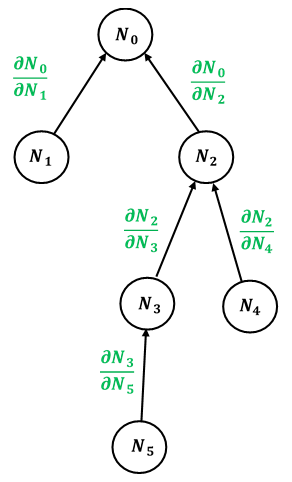

1. First, stack will be assigned with child nodes of the parent node

        stack = N0.grad

        stack = [ (N1,  dN0 / dN1),  (N2,  dN0 / dN2) ]
        

2. We will take the last element from the stack 

        stack = [ (N1,  dN0 / dN1) ]
        
        
    and save it in variables 'node' and 'node_derivative'

        node = N2

        node_derivative = dN0 / dN2
        
    
    then add the node_derivative to the gradients[node]

        gradients[node] = gradients[node] + node_derivative
        
        gradients[N2] = dN0 / dN2
        

3. If 'node' has children nodes, iterate through them AND append them onto a stack with their derivative multiplied by 'node_derivative'

    * child_node = N3,    child_node_derivative = dN2 / dN3

            stack = [ (N1,  dN0 / dN1), (N3, dN2 / dN3 * dN0 / dN2) ]
            
            
    * child_node = N4,    child_node_derivative = dN2 / dN4

            stack = [ (N1,  dN0 / dN1), (N3, dN2 / dN3 * dN0 / dN2), (N4, dN2 / dN4 * dN0 / dN2) ]
            
            
4. Take again last element from the stack and save in 'node' and 'node_derivative' and add 'node_derivative' to gradients[node]

        stack = [ (N1,  dN0 / dN1), (N3, dN2 / dN3 * dN0 / dN2) ]

        node = N4

        node_derivative = dN2 / dN4 * dN0 / dN2

        gradients[N4] = dN2 / dN4 * dN0 / dN2
            

5. N4 has no children, so do nothing

6. Take again last element from the stack - repeat step 4 (fill in the blanks - you'll get better understanding):

        stack = [ (N1,  dN0 / dN1) ]

        node = N3

        node_derivative = dN2 / dN3 * dN0 / dN2

        gradients[N3] = dN2 / dN3 * dN0 / dN2
            

7. Iterate through children of node N3 - repeat step 3:

        * child_node = N5,    child_node_derivative = dN3 / dN5

            stack = [ (N1,  dN0 / dN1), (N5, dN3 / dN5 * dN2 / dN3 * dN0 / dN2) ]
            

8. What will be the next step?

        stack = [ (N1,  dN0 / dN1) ]

        node = N5

        node_derivative = dN3 / dN5 * dN2 / dN3 * dN0 / dN2

        gradients[N5] = dN3 / dN5 * dN2 / dN3 * dN0 / dN2
        
        
9. Does N5 have children? 

        * No

10. What is the next step?

        stack = []

        node = N1

        node_derivative = dN0 / dN1

        gradients[N1] = dN0 / dN1
        
        
11. What is the next step? When do we end?

In [233]:
def Get_Gradient(parent_node):
    """ Go down the graph, and compute derivative of `parent_node` with respect to each node """
    
    # we will create a dictionary 'gradient' which will have the nodes as keys and its derivatives as values
    gradients = defaultdict(lambda: 0)    # initialize the dictionary so when calling a non-existing key the value of 0 is assigned
    
    # stack will represent the list of tuples (node, node_derivative) 
    stack = parent_node.grad.copy()     
    
    while stack:                             # loop for each different branch
        # get node and node_derivative from the top of the stack - function pop()
        temp = stack.pop()                   
        node = temp[0]
        node_derivative = temp[1]            
        # add to the value of derivative of the node (gradients[node]) value node_derivative
        gradients[node] = gradients[node] + node_derivative  
        
        if not isinstance(node, Var):        # if the node has children, put them onto the stack
            # loop for each node in one branch
            for child_node, child_node_derivative in node.grad:                   
                # append child_node and child_node_derivative * node_derivative to the stack
                stack.append((child_node, child_node_derivative * node_derivative))
                
    return dict(gradients)

### Test the function
#### 1. Example

$$ f(x_1, x_2, x_3) = \sin(x_2 + {x_1}^2) \frac{x_3 - x_1}{x_2} $$

$$ \frac{\partial f}{\partial x_1} = \sin(x_2 + {x_1}^2) (- \frac{1}{x_2}) + \frac{x_3-x_1}{x_2} \cos(x_2 + {x_1}^2) 2x_1 $$

In [234]:
def f(x1, x2, x3):
    if type(x1) == int:                                           # check if type of arguments (any argument) is int - then return the equation with np.sin, otherwise Sin
        return np.sin(x2 + x1**2) * ((x3 - x1) / x2)
    return Sin(x2 + x1**2) * ((x3 - x1) / x2)

def part_f_x1(x1, x2, x3):
    return np.sin(x2 + x1**2) * (-1 / x2) + ((x3 - x1)/x2 * np.cos(x2 + x1**2) * 2 * x1)

def part_f_x2(x1, x2, x3):
    return (1/x2)*(x3-x1)*np.cos(x2+x1**2)-(1/x2**2)*(x3-x1)*np.sin(x2+x1**2)

def part_f_x3(x1, x2, x3):
    return (1/x2)*np.sin(x2+x1**2)

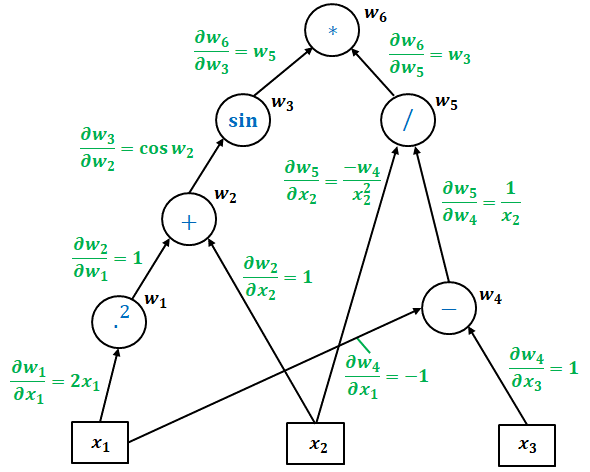

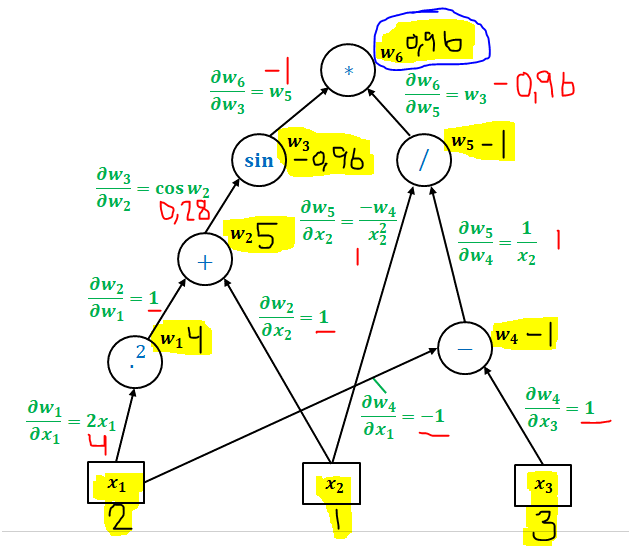

In [235]:
# assign the values
x1_val = 2
x2_val = 1
x3_val = 3

In [253]:
x1 = Var(x1_val)
x2 = Var(x2_val)
x3 = Var(x3_val)

y = f(x1, x2, x3)
gradients = Get_Gradient(y)

print('Value of f equals', y.value)
print('The partial derivative of y with respect to x1 =', gradients[x1])
print('The partial derivative of y with respect to x2 =', gradients[x2])
print('The partial derivative of y with respect to x3 =', gradients[x3])

Value of f equals -0.9589242746631385
The partial derivative of y with respect to x1 = 2.0935730165160433
The partial derivative of y with respect to x2 = 1.2425864601263648
The partial derivative of y with respect to x3 = -0.9589242746631385


In [254]:
print('[Manual way] Value of f equals', f(x1_val, x2_val, x3_val))
print('[Manual way] Value of partial derivative of f with respect to x1 equals', part_f_x1(x1_val, x2_val, x3_val))
print('[Manual way] Value of partial derivative of f with respect to x2 equals', part_f_x2(x1_val, x2_val, x3_val))
print('[Manual way] Value of partial derivative of f with respect to x3 equals', part_f_x3(x1_val, x2_val, x3_val))

[Manual way] Value of f equals -0.9589242746631385
[Manual way] Value of partial derivative of f with respect to x1 equals 2.0935730165160433
[Manual way] Value of partial derivative of f with respect to x2 equals 1.2425864601263648
[Manual way] Value of partial derivative of f with respect to x3 equals -0.9589242746631385


## Test: Black-Scholes

In [238]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import style 
style.use('ggplot')
from scipy.stats import norm
import scipy

In [239]:
S0 = 100
K = 100
T = 1
r = 0.07
sigma = 0.2

In [246]:
def euro_call(S0, K, T, r, sigma):
    d1 = (Log(S0/K)+(r+1/2*(sigma**2))*T)/(sigma*Sqrt(T))
    d2 = d1 - sigma*Sqrt(T)
    return S0 * Cdf(d1)  - K * Exp((-1)*r * T) * Cdf(d2)

In [248]:
x4 = Var(x1_val)
x5 = Var(x2_val)
x6 = Var(x3_val)

S0_Var = Var(S0)
K_Var = Var(K)
T_Var = Var(T)
r_Var = Var(r)
sigma_Var = Var(sigma)

y = euro_call(S0_Var, K_Var, T_Var, r_Var, sigma_Var)
gradients = Get_Gradient(y)

print('Value of f equals', y.value)
print('The partial derivative of y with respect to S0 =', gradients[S0_Var])
print('The partial derivative of y with respect to K =', gradients[K_Var])
print('The partial derivative of y with respect to T =', gradients[T_Var])
print('The partial derivative of y with respect to r =', gradients[r_Var])
print('The partial derivative of y with respect to sigma =', gradients[sigma_Var])

Value of f equals 11.541470170672412
The partial derivative of y with respect to S0 = 1.0116756801823392
The partial derivative of y with respect to K = -0.896260978475615
The partial derivative of y with respect to T = 14.752687797213138
The partial derivative of y with respect to r = 89.62609784756148
The partial derivative of y with respect to sigma = 84.78860947883834


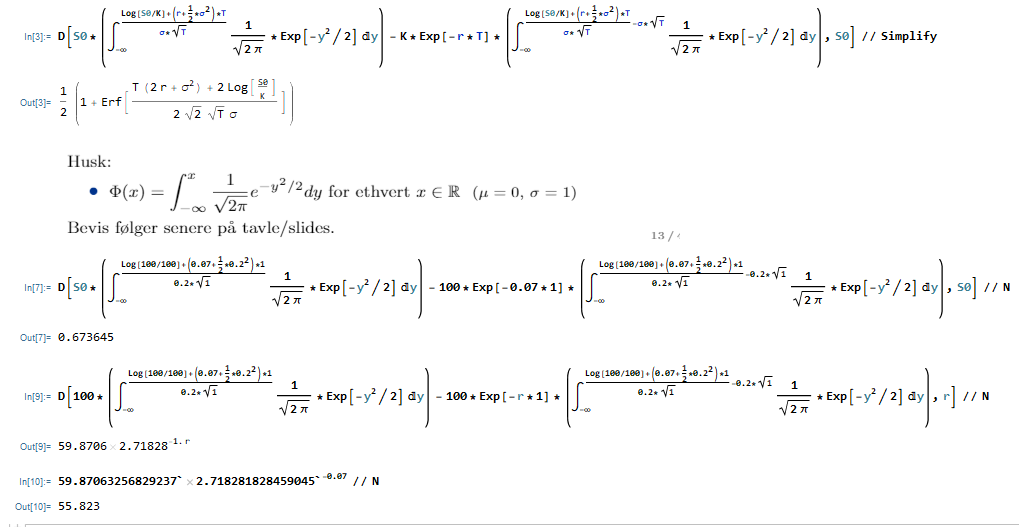

In [256]:
euro_call(S0_Var, K_Var, T_Var, r_Var, sigma_Var).value

11.541470170672412

In [255]:
euro_call(S0_Var, K_Var+1, T_Var, r_Var, sigma_Var).value

10.992258894798937

In [257]:
euro_call(S0_Var, K_Var+1, T_Var, r_Var, sigma_Var).value-euro_call(S0_Var, K_Var, T_Var, r_Var, sigma_Var).value

-0.5492112758734748

#### 2. Other functions
We created simple test function which you can use

In [314]:
def test(fun, der_fun, args):
    """ Testing function, arguments:
            fun - function with function equation
            der_fun - function which returns the gradient of the function
            args - list of x values
        Checks if the result of der_fun(args) is equal to get_gradients(fun(args))"""
    x_nodes = []
    for arg in args:
        x_nodes.append(Var(arg))
        
    final_node = fun(*x_nodes)
    test_gradients = Get_Gradient(final_node)    
    gradients = der_fun(*args)
    
    for i in range(len(args)):
        if round(test_gradients[x_nodes[i]], 3) != round(gradients[i], 3):
            print('Incorrect values for argument no.', i+1)
            return False
        
    print('The values of partial derivatives are: ', end=" ")
    for i in range(len(args)):
        print(f"df/dx{i+1}={round(test_gradients[x_nodes[i]], 2)}", end="   ")
        
    return True

In [315]:
# Example of calling test - previous equation
def f0(x1, x2, x3):
    return Sin(x2 + x1 ** 2)*(x3 - x1) / x2


def der_f0(x1, x2, x3):
    p_x1 = np.sin(x2 + x1 ** 2) * (-1 / x2) + ((x3 - x1)/x2 * np.cos(x2 + x1 ** 2) * 2*x1)
    p_x2 = np.sin(x2 + x1 ** 2) * (x1 - x3) / (x2 ** 2) + np.cos(x2 + x1 ** 2) * (x3 - x1)/x2 
    p_x3 = np.sin(x2 + x1 ** 2) / x2
    return [p_x1, p_x2, p_x3]

# assign values
x1 = 2
x2 = 1
x3 = 3

# call test function
test(f0, der_f0, [x1, x2, x3])

The values of partial derivatives are:  df/dx1=2.09   df/dx2=1.24   df/dx3=-0.96   

True

$$ f_1(x_1, x_2) = (x_1 + x_2) x_1 $$

In [316]:
def f1(x1, x2):
    return (x1 + x2) * x1

def der_f1(x1, x2):
    p_x1 = 2*x1 + x2
    p_x2 = x1
    return [p_x1, p_x2]

In [317]:
# call test function
x1 = 5
x2 = 7
test(f1, der_f1, [x1, x2])

The values of partial derivatives are:  df/dx1=17   df/dx2=5   

True

$$ f_2(x_1, x_2, x_3) = \frac{x_2^2 + x_3^3}{x_1} + x_2 * x_3 $$

In [318]:
def f2(x1, x2, x3):
    return ((x2 ** 2 + x3 ** 3) / x1 + x2 * x3)

def der_f2(x1, x2, x3):
    p_x1 = -(x2 ** 2 + x3 ** 3) / (x1 ** 2)
    p_x2 = 2 * x2 / x1 + x3
    p_x3 = 3 * x3 ** 2 / x1 + x2
    return [p_x1, p_x2, p_x3]

In [319]:
x1 = 19
x2 = 2
x3 = 10
test(f2, der_f2, [x1, x2, x3])

The values of partial derivatives are:  df/dx1=-2.78   df/dx2=10.21   df/dx3=17.79   

True

$$ f_3(x_1, x_2, x_3, x_4) = {(x_1 x_4 x_2)}^2 \frac{x_3}{1 - x_4} $$

In [320]:
def f3(x1, x2, x3, x4):
    return (x1 * x4 * x2) ** 2 * x3 / (Var(1) - x4)

def der_f3(x1, x2, x3, x4):
    p_x1 = x3 / (1 - x4) * 2 * x1 * x4 * x2 * x4 * x2
    p_x2 = x3 / (1 - x4) * 2 * x1 * x4 * x2 * x1 * x4
    p_x3 = (x1 * x4 * x2) ** 2 / (1 - x4) 
    p_x4 = (x1 * x4 * x2) ** 2 * x3 / ((1 - x4) ** 2) + x3 / (1 - x4) * 2 * x1 * x4 * x2 * x1 * x2
    return [p_x1, p_x2, p_x3, p_x4]

In [321]:
x1 = 19
x2 = 2
x3 = 10
x4 = 5
test(f3, der_f3, [x1, x2, x3, x4])

The values of partial derivatives are:  df/dx1=-9500.0   df/dx2=-90250.0   df/dx3=-9025.0   df/dx4=-13537.5   

True

Let's look on simple Black Scholes example:
​
$$ f_1(x_1, x_2) = cos(x_1^2-x_2) + \frac{1}{x_2} $$

Try to change the gradients function to calculate derivatives of Black Scholes!

Reminder from the presentation:

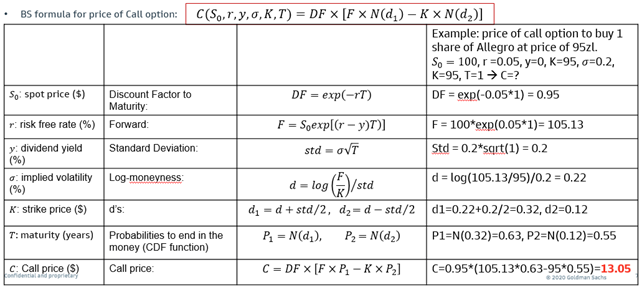

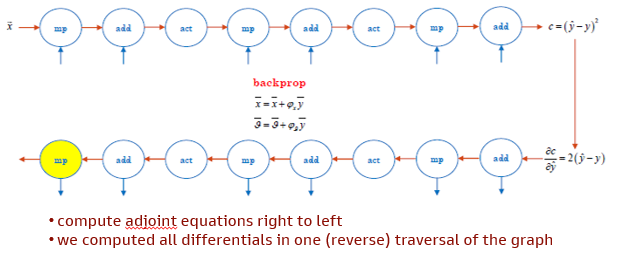